# **SPAM ANALYSIS AND DETECTION**

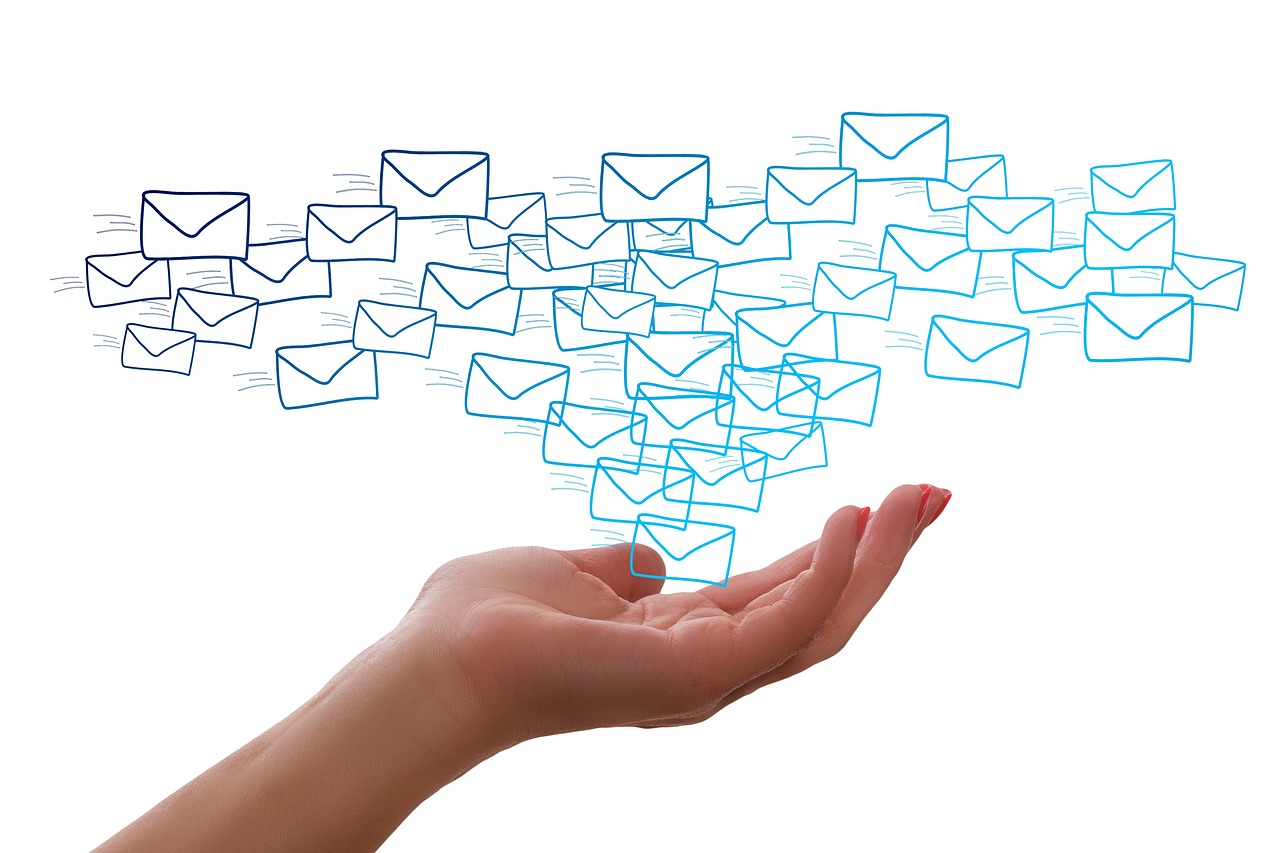

In [28]:
from IPython.display import Image
Image(filename='e-mail-3597088_1280.jpg', width=1000, height=1000)

# Table of Content

<a id="cont"></a>

<a href=#one>1. Objectives</a> 

<a href=#two>2. Importing Libraries</a>

<a href=#three>3. Data Collection and Preprocessing</a>

<a href=#four>4. Exploratory data Analysis</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. modeling</a>

<a href=#seven>7. Model review</a>

<a id="one"></a>
# **1. Objectives**
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

Email is one of the quickest means of communication widely utilized by both companies and individuals on a daily basis. Despite its convenience, there are drawbacks associated with using emails, with one of the major issues being 'SPAM.' Spam emails are unsolicited mails sent to a large number of users, serving various purposes such as advertising, phishing, spreading malware, and engaging in other malicious activities. The presence of spam can significantly impact user experience, leading to dissatisfaction. To enhance user experience and mitigate the negative effects of spam, companies that manage email services have implemented filters. These filters work to identify and segregate spam, ensuring that users do not interact with emails that may compromise their computers or expose them to scams. This proactive approach helps safeguard users from potential harm and maintains the integrity of the communication platform.

The project's primary objective is to construct a model capable of accurately predicting whether an email is classified as spam or not. The dataset utilized for this project was obtained from the Kaggle platform. The user interface includes a textbox where users can input their email, click the predict button and the model will subsequently provide a prediction indicating whether the email is categorized as spam or not.
    


<a id="two"></a>
# **2.   Importing Libraries**
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

In [6]:
#Importing libraries for data cleaning, processing and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express  as px
import time
from wordcloud import WordCloud
from collections import Counter
import re
import joblib

#Libraries for Natural Language processing
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
import urllib
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Libraries for data engineering and modeling
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
Random_state=42 
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mapas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a id="three"></a>
# **3. Data Collection and PreProcessing**
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

### **3.1 Reading data into a dataframe**

In [7]:
#Spam table
Spam=pd.read_csv("spam.csv",encoding='latin-1' )
#Viewing dataframe
Spam.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


### **3.2 More details on the dataframe**

In [8]:
# Columns information
Spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### **3.3 Dropping the Columns**

In [9]:
#Dropping the three columns that contain null values
Spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
#Replacing the word ham into not spam
Spam['v1'] = Spam['v1'].replace("ham", "not spam")

<a id="four"></a>
# **4. Exploratory Data Analysis**
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

### **4.1 Distribution of the mails** 

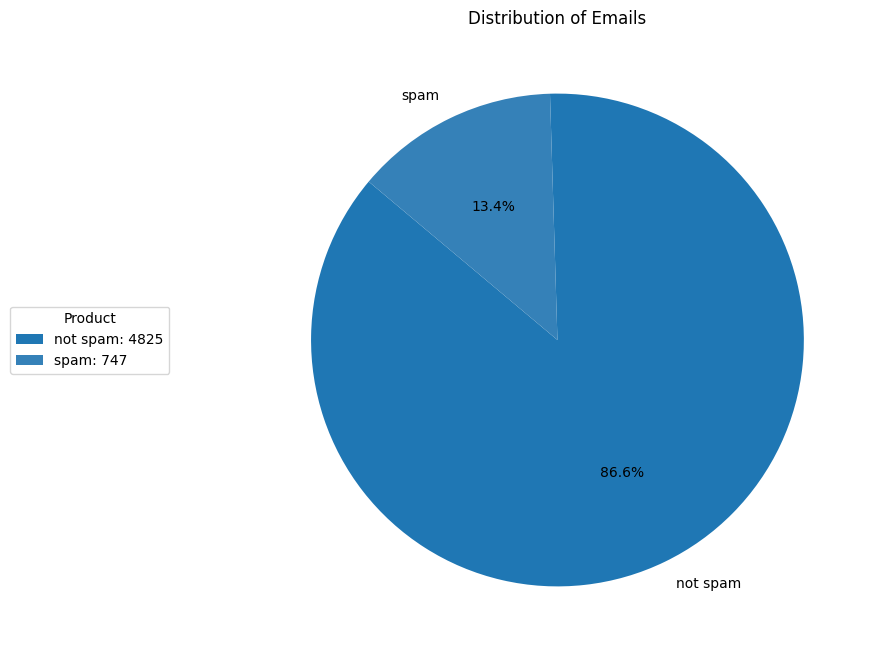

In [10]:
#Counting the distribution of spam and normal mail
product_counts = Spam['v1'].value_counts()

# Setting custom shades of blue
colors = ['#1f77b4', '#3581b8']

# Plotting the pie chart
plt.figure(figsize=(8, 8))  
wedges, texts, _ = plt.pie(product_counts.values, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Set the text in the center of each slice with the exact count
# for text in texts:
#     text.set_color('white')  # Setting text color to white
#     text.set_fontsize(12)  # Setting text font size
#     text.set_fontweight('bold')  # Setting text font weight

# Adding the count as legend on the left side
legend_labels = [f'{product}: {count}' for product, count in zip(product_counts.index, product_counts.values)]
plt.legend(wedges, legend_labels, title='Product', loc='center left', bbox_to_anchor=(-0.4, 0.5))

# Title
plt.title('Distribution of Emails')

# Displaying the plot
plt.show()


### **4.2 Distribution of words length of both spam and normal mail**

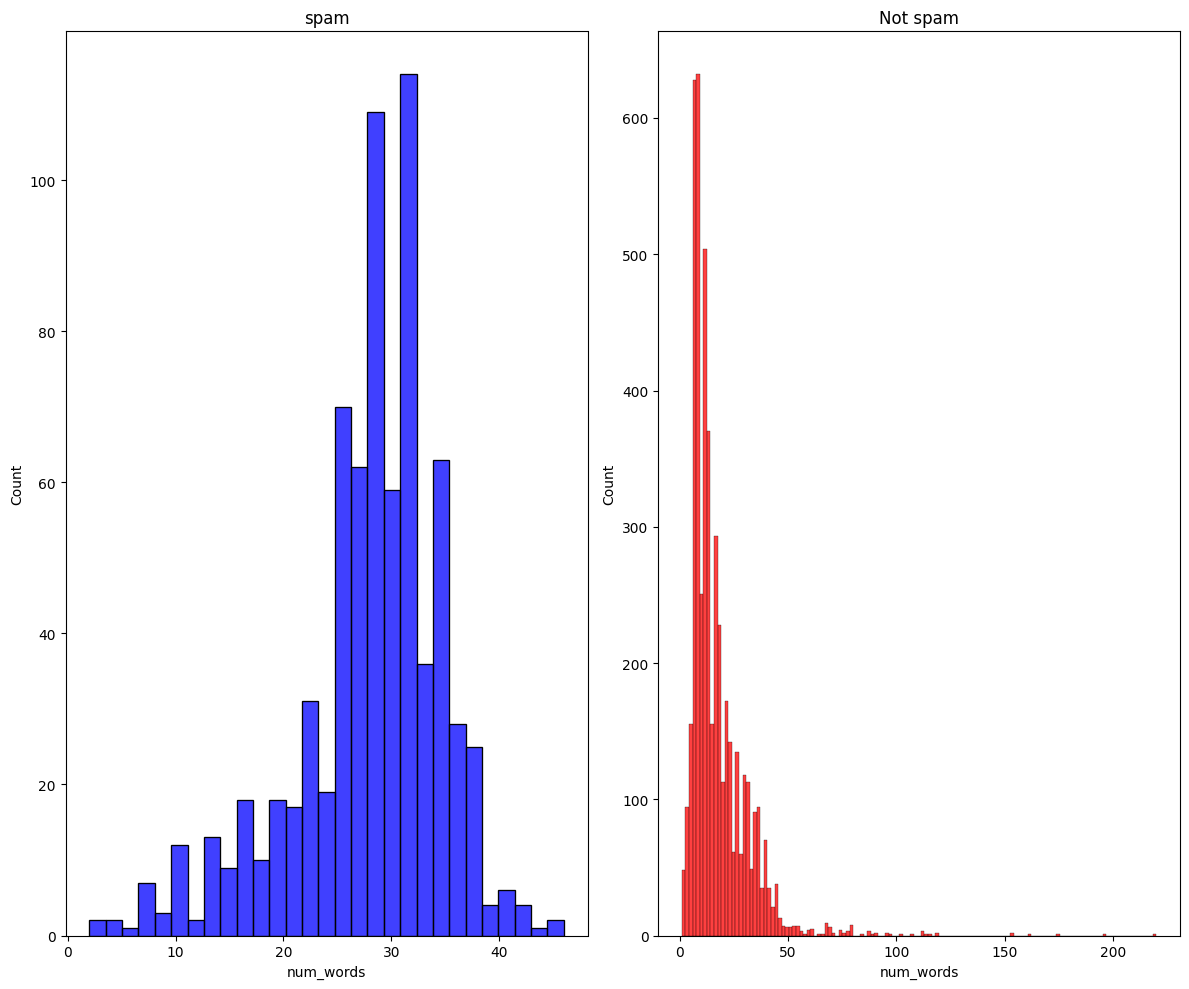

In [11]:
#Changing the v2 column to string
Spam['v2']=Spam['v2'].astype(str)

#Creating a number of Words feature
Spam['num_words']=Spam['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

# Creating a 3x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot histogram for  'credict_reporting'
sns.histplot(Spam[Spam['v1'] == 'spam']['num_words'], ax=axes[0], color='blue')
axes[0].set_title('spam')

# Plotting histogram for 'debt_collection'
sns.histplot(Spam[Spam['v1'] == 'not spam']['num_words'], ax=axes[1], color='red')
axes[1].set_title('Not spam')

# Adjusting the spacing between subplots
plt.tight_layout()

# Showingthe subplots
plt.show()

**Spam Email Distribution (0-50 words):**

Spam emails predominantly exhibit word counts ranging from 0 to 50. This characteristic aligns with the common practice among spammers to keep their messages concise and to the point, often using fewer words to convey their intended message.

**Normal Email Distribution (0-250 words):**

In contrast, normal emails showcase a broader spectrum of word counts, spanning from 0 to 250 words. This variability is attributable to the diverse nature of regular communication, where content may range from brief updates to more detailed information.

**Interpretation:**

Emails exceeding 50 words are more likely to be classified as normal rather than spam. The observed threshold aligns with the tendency of spam emails to remain succinct. However, it is crucial to note that a word count below 50 does not definitively categorize an email as spam. Many legitimate emails, particularly those conveying succinct information or updates, may fall within this range.

### **4.3 Word clouds for top 20 words in spam mail and normal mail**

Category: Spam, Number of Words: 16983
Category: Not Spam, Number of Words: 8331


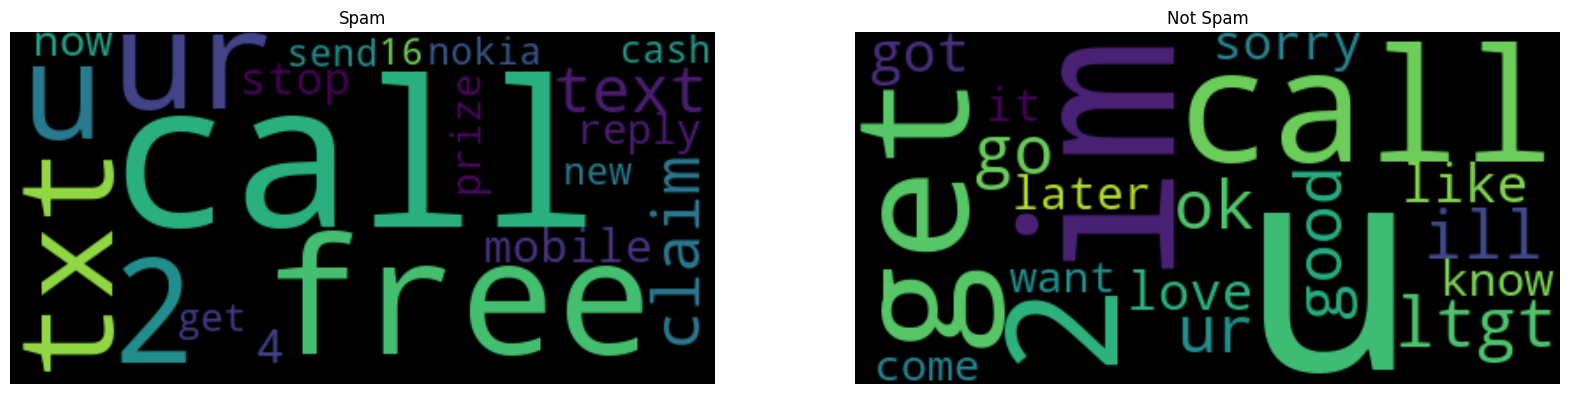

In [25]:
#A function of removing stopwords
def remove_stopwords(text):
    """
    Remove stopwords from the given text.

    Args:
        text (str): The input text from which stopwords are to be removed.

    Returns:
        str: The text with stopwords removed.
    """
    stop_words = set(stopwords.words('english'))   # Set of stopwords in English
    tokens = text.split()                          # Splitting the text into individual words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filtering out stopwords
    return ' '.join(filtered_tokens)              # Joining the filtered tokens back into a text

#Removing stop words using remove_stopwords function
Spam['updated_mail'] = Spam['v2'].apply(remove_stopwords)


#A function for removing punctuations
def remove_punctuation(post):
    """
    Remove punctuation marks from the given post.

    Args:
        post (str): The input post from which punctuation marks are to be removed.

    Returns:
        str: The post with punctuation marks removed.
    """
    return ''.join([l for l in post if l not in string.punctuation])

#Removing punctuation using remove_punctuation function
Spam['updated_mail'] = Spam['updated_mail'].apply(remove_punctuation).str.lower() #Words converted to lower case



#Masking mail category
spam = Spam.loc[Spam['v1'] == 'spam', 'updated_mail'] #Spam email
not_spam = Spam.loc[Spam['v1'] == 'not spam', 'updated_mail'] #Normal email


# Defining the categories and their respective texts
categories = ['Spam', 'Not Spam']
texts = [spam, not_spam]

# Creating subplots with 1 row and len(categories) columns
fig, axs = plt.subplots(1, len(categories), figsize=(20, 10))  # Adjust the figsize as needed

# Generating word clouds for each category and plot them
for i, ax in enumerate(axs):
    # Calculating word distribution
    text = ' '.join(texts[i])
    words = text.split()
    print(f"Category: {categories[i]}, Number of Words: {len(words)}")

    # Generating word cloud
    wordcloud = WordCloud(max_words=20)
    wordcloud.generate_from_frequencies(Counter(words))

    # Ploting the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(categories[i])

# Showing the subplots

plt.savefig("image_streamlit.png", format='png')
plt.show()



**Common Spam-Indicative Words:**

**Free**: The term "free" is frequently used in spam emails, often associated with enticing offers or false promises.

**Claim**: Spam emails often encourage recipients to "claim" various prizes, creating a sense of urgency and excitement.

**Prize**: The mention of winning a "prize" is a common tactic in spam to grab the recipient's attention.

**Stop**: Action-oriented words like "stop" are utilized to prompt immediate responses, adding a sense of urgency.

**Reply**: Encouraging users to "reply" is a common spam tactic, aiming to engage the recipient in further communication.

**Text**: The use of "text" in spam emails suggests an alternative method of communication, often linked to scams or phishing attempts.

**Significance of Differences:**

These identified words exhibit a notable contrast between spam and non-spam emails. While these terms are prevalent in spam, they are less likely to be prominent in legitimate communication. This distinction forms a critical aspect for machine learning models in effectively differentiating between spam and non-spam content.

<a id="five"></a>
# 5. Data Engineering 
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

**5.1 Data Resampling**

In [14]:
#Spam
spam = Spam[Spam['v1'] == 'spam']
#not spam
normal= Spam[Spam['v1'] == 'not spam']

#Resampling spam mails
spam = resample(spam,
                    replace=True, 
                    n_samples=1000, 
                    random_state=42)
#Resampling Normal mails
normal= resample(normal,
                   replace=False, 
                   n_samples=1000, 
                 random_state=42)

#Joining the normal and spam mail
Spam = pd.concat([spam, normal])
Spam.head()

,v1,v2,num_words,NumberCount,updated_mail
712,spam,08714712388 between 10am-7pm Cost 10p,5,1,08714712388 10am7pm cost 10p
3228,spam,Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send COLLECT to 83600 only 150p/msg. CC: 08718720201 PO BOX 114/14 TCR/W1,26,5,ur cashbalance currently 500 pounds maximize ur cashin send collect 83600 150pmsg cc 08718720201 po box 11414 tcrw1
1928,spam,Call from 08702490080 - tells u 2 call 09066358152 to claim å£5000 prize. U have 2 enter all ur mobile & personal details @ the prompts. Careful!,30,5,call 08702490080 tells u 2 call 09066358152 claim å£5000 prize u 2 enter ur mobile personal details prompts careful
737,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 Mobile from ONLY å£10 at TXTAUCTION! Txt word: START to No: 81151 & get yours Now! 4T&Ctxt TC 150p/MTmsg,34,2,hi customer loyalty offerthe new nokia6650 mobile å£10 txtauction txt word start no 81151 get now 4tctxt tc 150pmtmsg
504,spam,+123 Congratulations - in this week's competition draw u have won the å£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm,32,5,123 congratulations weeks competition draw u å£1450 prize claim call 09050002311 b4280703 tcsstop sms 08718727868 18 150ppm


**5.2 Lemmatization**

In [15]:
def lemmatize_text(text):
    # Initializing the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Tokenizing the text into individual words
    words = nltk.word_tokenize(text)
    
    # Lemmatize each word and join them back into a sentence
    lemmatized_text = ' '.join(lemmatizer.lemmatize(word) for word in words)
    
    return lemmatized_text

#applying the function on the updated text
Spam['lemmatized_mail'] = Spam['updated_mail'].apply(lemmatize_text)
Spam['lemmatized_mail'].head()

712                                                                                                 08714712388 10am7pm cost 10p
3228          ur cashbalance currently 500 pound maximize ur cashin send collect 83600 150pmsg cc 08718720201 po box 11414 tcrw1
1928            call 08702490080 tell u 2 call 09066358152 claim å£5000 prize u 2 enter ur mobile personal detail prompt careful
737        hi customer loyalty offerthe new nokia6650 mobile å£10 txtauction txt word start no 81151 get now 4tctxt tc 150pmtmsg
504     123 congratulation week competition draw u å£1450 prize claim call 09050002311 b4280703 tcsstop sm 08718727868 18 150ppm
Name: lemmatized_mail, dtype: object

**5.3 Vectorization**

In [16]:
#Building the vectorizor
tf = CountVectorizer(
    max_features=500,
    ngram_range=(1, 4),
    max_df=0.95,
    min_df=1,  # You can experiment with different values
    lowercase=True
)
#Transforming the data with the vectorizier
X = tf.fit_transform(Spam['lemmatized_mail']).toarray()
joblib.dump(tf, 'tf_vector.joblib')

['tf_vector.joblib']

**5.4 Defining the response Variable**

In [17]:
# Building the label encoder
label_encoder = LabelEncoder()
#fitting and transforming the data
y = label_encoder.fit_transform(Spam['v1'])
#Reshaping the response data
y=y.reshape(-1, 1)
y = np.ravel(y)
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

**5.5 Spliting the data**

In [18]:
#Spliting the data
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=42)

<a id="six"></a>
# 6. Data Modeling 
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

**6.1 Building the model**

In [19]:
#Logistic Regression
lr=LogisticRegression(C=0.1)
#Support vector Machine
svc=SVC(kernel='rbf') 
#Random forest Classifier
rfc=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
#Decision Tree Classifier
dtc=DecisionTreeClassifier (max_depth=10, random_state=42)

**6.2 Training the model**

In [20]:
#Logistic Regression
lr.fit(X_train, y_train)
#Support vector Machine
svc.fit(X_train, y_train)
#Random forest Classifier
rfc.fit(X_train, y_train)
#Decision Tree Classifier
dtc.fit(X_train, y_train)
joblib.dump(lr, 'lr_Model.joblib')

['lr_Model.joblib']

<a id="seven"></a>
# 7 Models Review 
<a href=#cont title='takes you back to table of content'> Back to Table of Contents</a>

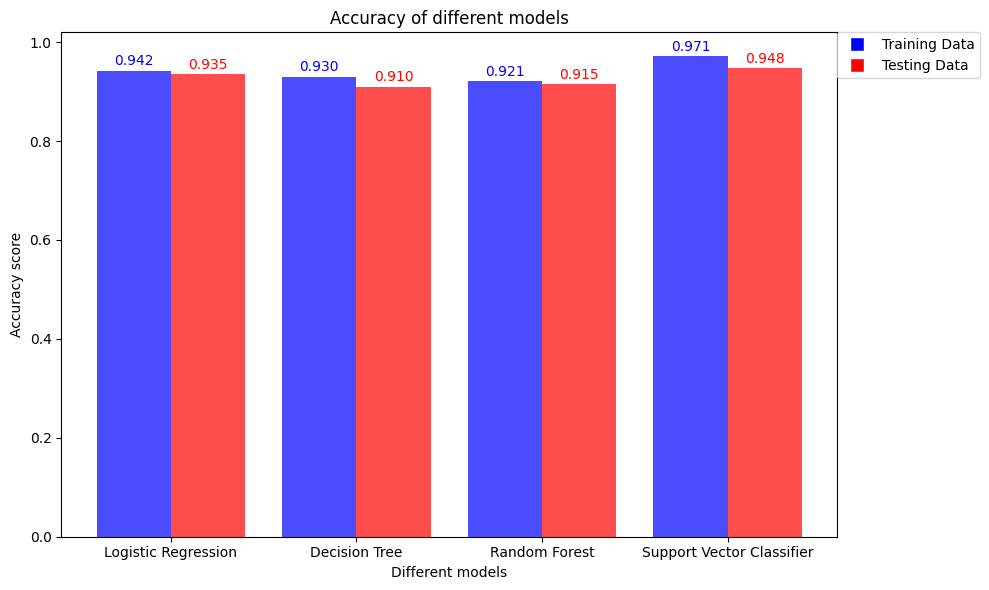

In [35]:
#Accuracy of logistic regression
Lr_train=accuracy_score(y_train, lr.predict(X_train))
Lr_test=accuracy_score(y_test, lr.predict(X_test))
#Accuracy of Decision Tree Classifier
Dt_train=accuracy_score(y_train, dtc.predict(X_train))
Dt_test=accuracy_score(y_test, dtc.predict(X_test))
#Accuracy of Random Forest Classifier
Rf_train=accuracy_score(y_train, rfc.predict(X_train))
Rf_test=accuracy_score(y_test, rfc.predict(X_test))
#Accuracy of Support Vector Classifier
svc_train=accuracy_score(y_train, svc.predict(X_train))
svc_test=accuracy_score(y_test, svc.predict(X_test))

categories = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier']
training  = [Lr_train, Dt_train, Rf_train, svc_train]  # The accuracy on the training data
testing= [Lr_test, Dt_test, Rf_test, svc_test] #the accuracy on the testing data

# Setting the positions for the bars
x = list(range(len(categories)))
x1 = [pos - 0.2 for pos in x] 
x2 = [pos + 0.2 for pos in x]  

training_color = 'blue'
testing_color = 'red'

# Creating figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Plotting the bar graph with values on top
for i, (tr, te) in enumerate(zip(training, testing)):
    ax.bar(x1[i], tr, width=0.4, align='center', color=training_color, alpha=0.7)
    ax.bar(x2[i], te, width=0.4, align='center', color=testing_color, alpha=0.7)
    ax.text(x1[i], tr + 0.005, f'{tr:.3f}', ha='center', va='bottom', color=training_color)
    ax.text(x2[i], te + 0.005, f'{te:.3f}', ha='center', va='bottom', color=testing_color)

# Manually adding legends
legend_labels = ['Training Data', 'Testing Data']
legend_colors = [training_color, testing_color]
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]

# Setting labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Different models')
ax.set_ylabel('Accuracy score')
ax.set_title('Accuracy of different models')

# Moving the legend outside and removing the border
ax.legend(legend_patches, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()

All the models perfomed fairly well.